In [1]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import pandas as pd
import matplotlib.pylab as pl

In [17]:
files = glob.glob('logs/*.csv')
files

['logs\\AR_Wing-2020-08-11.csv',
 'logs\\AR_Wing-2020-08-13.csv',
 'logs\\AR_Wing-2020-08-18.csv',
 'logs\\AR_Wing-2020-08-24.csv',
 'logs\\AR_Wing-2020-08-26.csv',
 'logs\\AR_Wing-2020-08-26_2.csv',
 'logs\\AR_Wing-2020-08-30.csv',
 'logs\\AR_Wing-2020-08-31.csv',
 'logs\\AR_Wing-2020-08-31_2.csv',
 'logs\\AR_Wing-2020-08-31_3.csv',
 'logs\\AR_Wing-2020-09-06_1.csv',
 'logs\\AR_Wing-2020-09-06_2.csv',
 'logs\\AR_Wing-2020-10-16.csv',
 'logs\\AR_Wing-2020-11-14.csv',
 'logs\\AR_Wing-2020-11-14_2.csv',
 'logs\\AR_Wing-2020-11-14_3.csv',
 'logs\\AR_Wing-2020-11-14_4.csv',
 'logs\\AR_Wing-2020-11-14_5.csv',
 'logs\\AR_Wing-2021-01-01.csv',
 'logs\\AR_Wing-2021-01-01_bis.csv',
 'logs\\AR_Wing-2021-01-04.csv',
 'logs\\AR_Wing-2021-01-10.csv',
 'logs\\AR_Wing-2021-01-15.csv',
 'logs\\AR_Wing-2021-01-25.csv',
 'logs\\AR_Wing-2021-01-28.csv',
 'logs\\AR_Wing-2021-02-05.csv',
 'logs\\AR_Wing-2021-02-07.csv']

In [3]:
def get_rssi(RSSI, dist):
    [a,b] = np.polyfit(np.log(dist), RSSI, 1)
    rssi_time = a * np.log(dist) + b
    rssi_dist = a * np.log(np.sort(dist)) + b
    return a, b

# Courbes

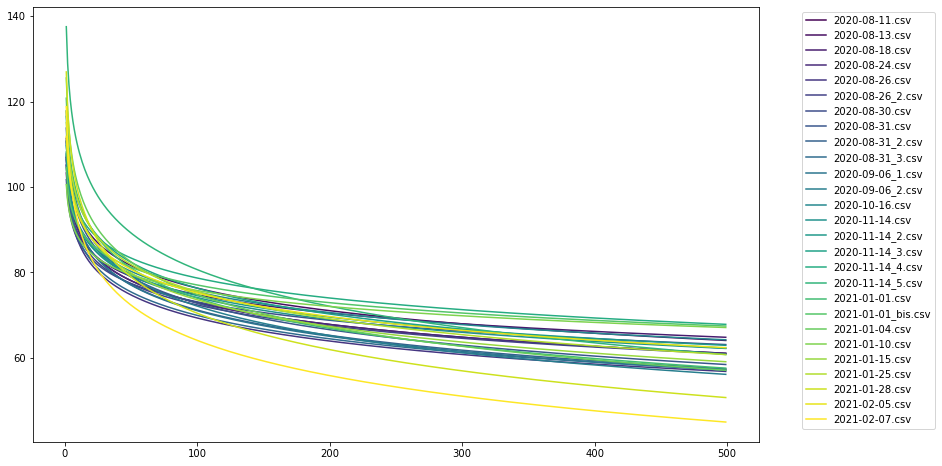

In [11]:
plt.figure(figsize=(13,8))
colors = pl.cm.viridis(np.linspace(0,1,len(files)))
stats = []
for i,file in enumerate(files):
    data = pd.read_csv(file, sep=';', parse_dates=[0,1] , infer_datetime_format=True)
    dist, rssi = data['Dist(m)'], data['RSSI(dB)']
    filt = (rssi != 0) & (dist != 0)
    # fitting
    a, b = get_rssi(rssi[filt], dist[filt])
    dist_fit = np.arange(1,500)
    rssi_fit = a * np.log(dist_fit) + b
    # stats
    stats.append((str(data['Date'][0])[:10], np.max(rssi[filt]), np.mean(rssi[filt]), np.min(rssi[filt])))
    # display
    plt.plot(dist_fit, rssi_fit, label=file[13:], color=colors[i])
plt.legend(bbox_to_anchor=(1.25, 1))
plt.show()

# Points

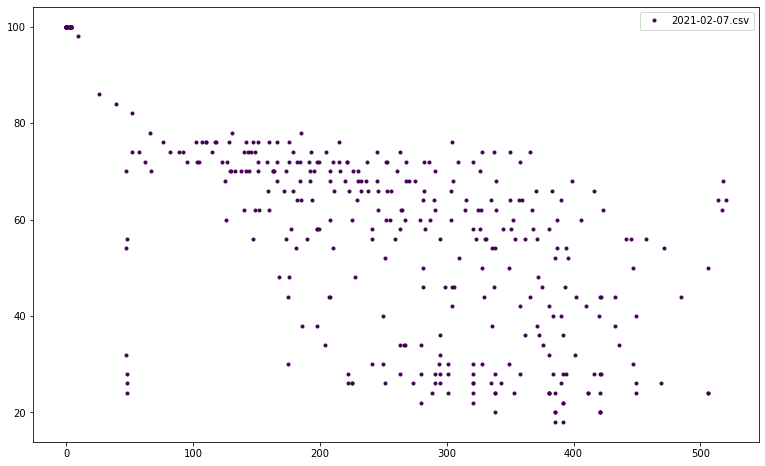

In [21]:
plt.figure(figsize=(13,8))
colors = pl.cm.viridis(np.linspace(0,1,len(files)))
for i,file in enumerate(files[-1:]):
    data = pd.read_csv(file, sep=';', parse_dates=[0,1] , infer_datetime_format=True)
    dist, rssi = data['Dist(m)'], data['RSSI(dB)']
    plt.plot(dist, rssi, '.', label=file[13:], color=colors[i])
plt.legend()
plt.show()

# Les deux

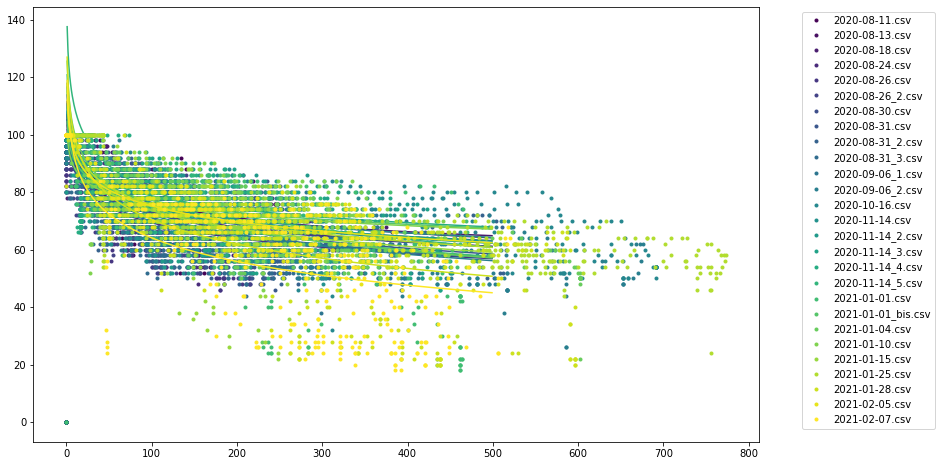

In [24]:
plt.figure(figsize=(13,8))
colors = pl.cm.viridis(np.linspace(0,1,len(files)))
stats = []
for i,file in enumerate(files):
    data = pd.read_csv(file, sep=';', parse_dates=[0,1] , infer_datetime_format=True)
    dist, rssi = data['Dist(m)'], data['RSSI(dB)']
    filt = (rssi != 0) & (dist != 0)
    # fitting
    a, b = get_rssi(rssi[filt], dist[filt])
    dist_fit = np.arange(1,500)
    rssi_fit = a * np.log(dist_fit) + b
    # stats
    stats.append((str(data['Date'][0])[:10], np.max(rssi[filt]), np.mean(rssi[filt]), np.min(rssi[filt])))
    # display
    plt.plot(dist_fit, rssi_fit, color=colors[i])
    plt.plot(dist, rssi, '.', label=file[13:], color=colors[i])
plt.legend(bbox_to_anchor=(1.25, 1))
plt.show()